In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [3]:
x_train=np.loadtxt('input.csv', delimiter=',')
y_train=np.loadtxt('labels.csv', delimiter=',')

x_test=np.loadtxt('input.csv', delimiter=',')
y_test=np.loadtxt('labels.csv', delimiter=',')

In [4]:
x_train=x_train.reshape(len(x_train),100,100,3)
y_train=y_train.reshape(len(y_train),1)

x_test=x_test.reshape(len(x_test),100,100,3)
y_test=y_test.reshape(len(y_test),1)

x_train=x_train/255.0
x_test=x_test/255.0

In [5]:
print("Shape of x_train: ",x_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of x_test: ",x_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (2000, 100, 100, 3)
Shape of y_train:  (2000, 1)
Shape of x_test:  (2000, 100, 100, 3)
Shape of y_test:  (2000, 1)


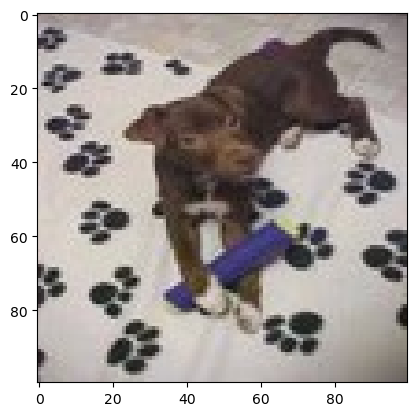

In [6]:
#loading dataset
idx=random.randint(0,len(x_train))
plt.imshow(x_train[idx,:])
plt.show()

In [7]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu', input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [8]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))
    
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
    
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
model.fit(x_train,y_train,epochs=5,batch_size=64)

Epoch 1/5
32/32 [==============================] - 17s 442ms/step - loss: 0.7374 - accuracy: 0.4970
Epoch 2/5
32/32 [==============================] - 14s 430ms/step - loss: 0.6877 - accuracy: 0.5060
Epoch 3/5
32/32 [==============================] - 14s 434ms/step - loss: 0.6810 - accuracy: 0.5770
Epoch 4/5
32/32 [==============================] - 14s 443ms/step - loss: 0.6269 - accuracy: 0.6560
Epoch 5/5
32/32 [==============================] - 14s 438ms/step - loss: 0.5800 - accuracy: 0.7010


In [21]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 4s 62ms/step - loss: 0.0894 - accuracy: 0.9765


[0.08944074809551239, 0.9764999747276306]

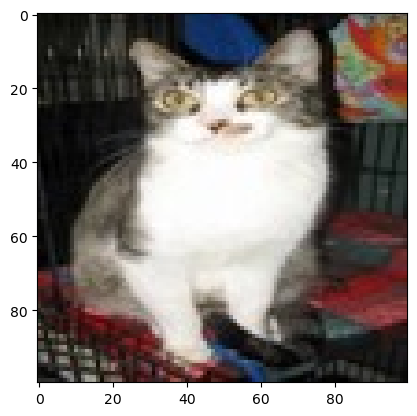

1/1 [==============================] - 0s 41ms/step
Our model says it is a cat


In [24]:
idx2=random.randint(0,len(y_test))
plt.imshow(x_test[idx2,:])
plt.show()

y_pred=model.predict(x_test[idx2,:].reshape(1,100,100,3))
y_pred=y_pred>0.5

if(y_pred==0):
    pred='dog'
else:
    pred='cat'
 
print("Our model says it is a",pred)